In [1]:
#Initializing
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Cleaning Data

In [2]:
# Import the raw data.
df = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv', skiprows = 4)

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


In [4]:
#stripping column names of spaces to be referenced
df.columns.str.strip()

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [5]:
#renaming columns to avoid /n in name
df.columns = ['City', 'Population', 'Violent Crime',
       'Murder and Nonnegligent Manslaughter',
       'Rape (revised definition)1', 'Rape (legacy definition)2',
       'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary',
       'Larceny-Theft', 'Motor Vehicle Theft', 'Arson3']

In [6]:
#Robbery column is 'non-null object type' need to change into float type later to conditionally evaluate. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City                                    351 non-null object
Population                              348 non-null object
Violent Crime                           348 non-null object
Murder and Nonnegligent Manslaughter    348 non-null float64
Rape (revised definition)1              0 non-null float64
Rape (legacy definition)2               348 non-null object
Robbery                                 348 non-null object
Aggravated Assault                      348 non-null object
Property Crime                          348 non-null object
Burglary                                348 non-null object
Larceny-Theft                           348 non-null object
Motor Vehicle Theft                     348 non-null object
Arson3                                  187 non-null float64
dtypes: float64(3), object(10)
memory usage: 35.7+ KB


In [7]:
# Removing commas and changing column type to float
df['Population'] = df['Population'].str.replace(',', '')
df['Population'] = df['Population'].replace('',np.nan).astype(float)

df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Robbery'] = df['Robbery'].replace('',np.nan).astype(float)

df['Property Crime'] = df['Property Crime'].str.replace(',', '')
df['Property Crime'] = df['Property Crime'].replace('',np.nan).astype(float)

df['Violent Crime'] = df['Violent Crime'].str.replace(',', '')
df['Violent Crime'] = df['Violent Crime'].replace('',np.nan).astype(float)

df['Rape (legacy definition)2'] = df['Rape (legacy definition)2'].str.replace(',', '')
df['Rape (legacy definition)2'] = df['Rape (legacy definition)2'].replace('',np.nan).astype(float)

df['Aggravated Assault'] = df['Aggravated Assault'].str.replace(',', '')
df['Aggravated Assault'] = df['Aggravated Assault'].replace('',np.nan).astype(float)

df['Burglary'] = df['Burglary'].str.replace(',', '')
df['Burglary'] = df['Burglary'].replace('',np.nan).astype(float)

df['Larceny-Theft'] = df['Larceny-Theft'].str.replace(',', '')
df['Larceny-Theft'] = df['Larceny-Theft'].replace('',np.nan).astype(float)

df['Motor Vehicle Theft'] = df['Motor Vehicle Theft'].str.replace(',', '')
df['Motor Vehicle Theft'] = df['Motor Vehicle Theft'].replace('',np.nan).astype(float)

In [8]:
#creating murder feature
df['Murder'] = np.where(df['Murder and Nonnegligent Manslaughter'] > 0, 1, 0)

In [9]:
#creating robbery feature
df['Robbery_2'] = np.where(df['Robbery'] > 0, 1, 0)

In [10]:
df.head()

,City,Population,Violent Crime,Murder and Nonnegligent Manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-Theft,Motor Vehicle Theft,Arson3,Murder,Robbery_2
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,0,0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,0,0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,0,0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,1,1
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,0,1


In [11]:
#df.isna().sum()

In [12]:
df = df.dropna(subset=['Property Crime'])

# Using this data, building a regression model to predict property crimes.


Coefficients: 
 [[-7.80310548  2.37737708  4.80898749]]

Intercept: 
 [107.46986505]

R-squared:
0.9989791127949575


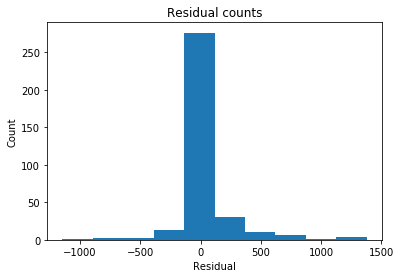

In [13]:
#Rerunning model

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property Crime'].values.reshape(-1, 1)
X = df[['Robbery','Burglary', 'Violent Crime']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

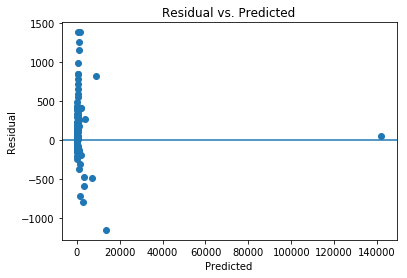

In [14]:
#Homoscedasticity Plot
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

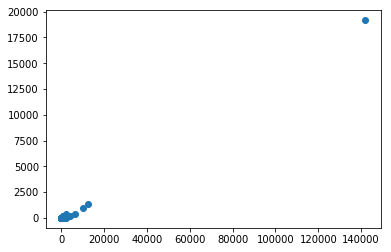

In [15]:
#Testing for linearity 
plt.scatter(df['Property Crime'], df['Robbery'])
plt.title('')
plt.show()

Our model does a very good job at explaining Property Crime, with a R-squared of 0.998. However since the R-squared is very close to 1 there could be signs of over-fitting. The outlier skewing the data is New York City, which has a significantly higher population compared to the rest of the cities.  